# 🚀 **Análise de Exoplanetas da Missão Kepler – NASA**

Este projeto tem como objetivo aplicar técnicas de **Análise de Dados** ao conjunto de dados públicos da **Missão Kepler** da NASA, que detectou exoplanetas utilizando o **método de trânsito** (detecção pela diminuição do brilho da estrela quando um planeta passa à sua frente).

---

## 🔧 Técnicas Utilizadas:

- 📊 **Inferência Estatística**
- 🧩 **Clusterização**
- 📈 **Regressão**
- 🧠 **Classificação**

---

## 🎯 Questões de Análise

A análise busca responder perguntas como:

- **Existem grupos distintos de exoplanetas com características comuns?**
- **Quais fatores mais influenciam o raio de um planeta?**
- **É possível prever a classificação de um planeta (Confirmado, Candidato ou Falso Positivo)?**

---

📁 **Fonte dos dados:**  
[Kepler Exoplanet Archive – Kaggle](https://www.kaggle.com/datasets/nasa/kepler-exoplanet-search-results)



**Importações e estilo para gráficos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

**Upload do dataset**

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving cumulative.csv to cumulative (1).csv


In [ ]:
df = pd.read_csv("cumulative.csv")

df.head()


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


**Análise inicial dos dados**

In [ ]:
df.info()


df.describe()


df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

,0
koi_teq_err2,9564
koi_teq_err1,9564
kepler_name,7270
koi_score,1510
koi_steff_err2,483
koi_srad_err2,468
koi_srad_err1,468
koi_steff_err1,468
koi_slogg_err2,468
koi_slogg_err1,468


**Seleção de colunas relevantes**

In [ ]:
df_clean = df[[
    'kepid',               # ID do planeta
    'koi_disposition',     # Classificação final (ex: CONFIRMED, FALSE POSITIVE)
    'koi_pdisposition',    # Probabilidade de ser planeta
    'koi_score',           # Score da detecção
    'koi_period',          # Período orbital (em dias)
    'koi_time0bk',         # Tempo de trânsito
    'koi_duration',        # Duração do trânsito
    'koi_depth',           # Profundidade do trânsito
    'koi_prad',            # Raio do planeta (em raios da Terra)
    'koi_steff',           # Temperatura efetiva da estrela
    'koi_slogg',           # Gravidade superficial da estrela
    'koi_srad',            # Raio da estrela
    'koi_impact',          # Impacto do trânsito
    'koi_insol',           # Insolação recebida (em relação à Terra)
]]

# Removendo entradas com dados faltando nessas colunas
df_clean = df_clean.dropna()


df_clean.head()

,kepid,koi_disposition,koi_pdisposition,koi_score,koi_period,koi_time0bk,koi_duration,koi_depth,koi_prad,koi_steff,koi_slogg,koi_srad,koi_impact,koi_insol
0,10797460,CONFIRMED,CANDIDATE,1.000,9.488036,170.538750,2.95750,615.8,2.26,5455.0,4.467,0.927,0.146,93.59
1,10797460,CONFIRMED,CANDIDATE,0.969,54.418383,162.513840,4.50700,874.8,2.83,5455.0,4.467,0.927,0.586,9.11
2,10811496,FALSE POSITIVE,FALSE POSITIVE,0.000,19.899140,175.850252,1.78220,10829.0,14.60,5853.0,4.544,0.868,0.969,39.30
3,10848459,FALSE POSITIVE,FALSE POSITIVE,0.000,1.736952,170.307565,2.40641,8079.2,33.46,5805.0,4.564,0.791,1.276,891.96
4,10854555,CONFIRMED,CANDIDATE,1.000,2.525592,171.595550,1.65450,603.3,2.75,6031.0,4.438,1.046,0.701,926.16


## 📊 Análise de Inferência Estatística

### 🎯 Objetivo

Investigar se a **temperatura das estrelas hospedeiras** difere significativamente entre exoplanetas **confirmados** e **falsos positivos**.

---

### 📈 Variável analisada

- `koi_steff`: Temperatura efetiva da estrela (em Kelvin)

---

### 🧪 Procedimento

Utilizamos um **teste t de Student para amostras independentes**, com o objetivo de verificar se há diferença significativa nas médias das temperaturas estelares entre os dois grupos.

---


### 📋 Resultado

- **Estatística t:** -18.7348  
- **Valor-p:** 4.9099293121e-76 (extremamente pequeno, ou seja, p < 0.0001)

---

### ✅ Conclusão

Como o valor-p é muito inferior a 0.05, há **diferença estatisticamente significativa** entre os dois grupos.

Isso indica que a **temperatura da estrela hospedeira é um fator relevante** na distinção entre exoplanetas confirmados e falsos positivos.

Planetas orbitando estrelas com diferentes temperaturas parecem ter maior ou menor chance de serem confirmados.

In [ ]:
import scipy.stats as stats


grupo_confirmado = df_clean[df_clean['koi_disposition'] == 'CONFIRMED']['koi_steff']
grupo_falso_positivo = df_clean[df_clean['koi_disposition'] == 'FALSE POSITIVE']['koi_steff']


t_stat, p_val = stats.ttest_ind(grupo_confirmado, grupo_falso_positivo, equal_var=False)

print(f"Estatística t: {t_stat:.4f}")
print(f"Valor-p (com notação científica): {p_val:.10e}")


if p_val < 0.05:
    print("Resultado: Diferença significativa nas temperaturas das estrelas.")
else:
    print("Resultado: NÃO há diferença significativa.")

Estatística t: -18.7348
Valor-p (com notação científica): 4.9099293121e-76
Resultado: Diferença significativa nas temperaturas das estrelas.


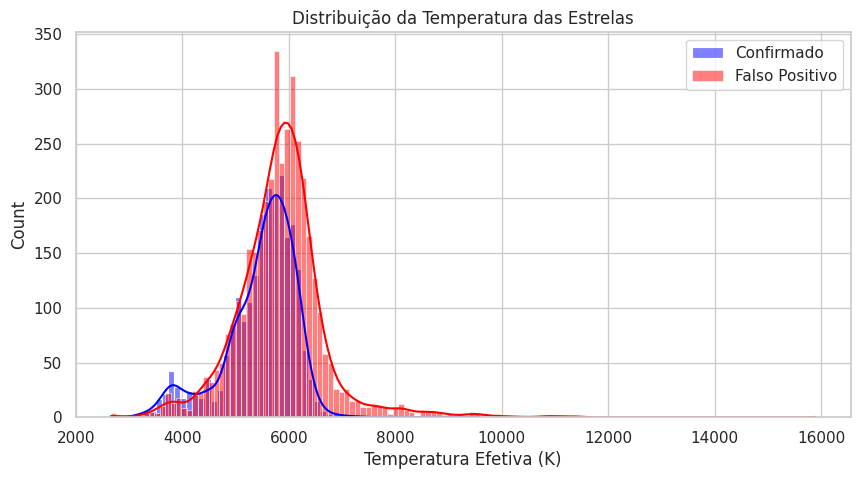

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(grupo_confirmado, color='blue', label='Confirmado', kde=True)
sns.histplot(grupo_falso_positivo, color='red', label='Falso Positivo', kde=True)
plt.title("Distribuição da Temperatura das Estrelas")
plt.xlabel("Temperatura Efetiva (K)")
plt.legend()
plt.show()

##Análise de Clusterização com K-Means

### 🎯 Objetivo

Agrupar exoplanetas com características semelhantes para descobrir **padrões naturais** entre eles, como tipos típicos de planetas (ex: "quentes e grandes", "pequenos e frios", etc.).

---

### 🔢 Variáveis utilizadas para o agrupamento

Utilizaremos variáveis numéricas que representam características físicas dos exoplanetas:

- `koi_prad`: Raio do planeta (em relação à Terra)  
- `koi_insol`: Insolação recebida (comparada à Terra)  
- `koi_steff`: Temperatura da estrela hospedeira

Essas variáveis ajudam a descrever o ambiente e o porte do planeta, sendo ideais para agrupamentos.

---

### 🧹 1. Pré-processamento

Antes de aplicar o K-Means, faremos:

1. Seleção das colunas que serão usadas no agrupamento  
2. Remoção de valores ausentes  
3. Padronização dos dados com `StandardScaler` (média 0 e desvio padrão 1)

---

### 🧪 2. Aplicação do K-Means

Com os dados prontos, faremos:

1. O **método do cotovelo (Elbow Method)** para identificar o melhor valor de `k` (número de grupos)  
2. Aplicação do algoritmo `KMeans` com o valor ideal de `k`  
3. Visualização dos grupos em gráfico 2D (e opcionalmente 3D)

---

### ✅ 3. Interpretação dos Clusters

Após o agrupamento, analisaremos:

- Quais perfis de exoplanetas surgiram em cada grupo?  
- Existem padrões relevantes entre os clusters?  
- Podemos distinguir **tipos típicos de planetas** com base nesses agrupamentos?


In [ ]:
from sklearn.preprocessing import StandardScaler

variaveis_cluster = ['koi_prad', 'koi_insol', 'koi_steff']
df_cluster = df_clean[variaveis_cluster].dropna()

scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(df_cluster)

import pandas as pd
df_padronizado = pd.DataFrame(dados_padronizados, columns=variaveis_cluster)

df_padronizado.head()


,koi_prad,koi_insol,koi_steff
0,-0.082232,-0.047531,-0.299952
1,-0.080406,-0.048031,-0.299952
2,-0.042688,-0.047852,0.204981
3,0.017751,-0.042805,0.144084
4,-0.080662,-0.042602,0.430805


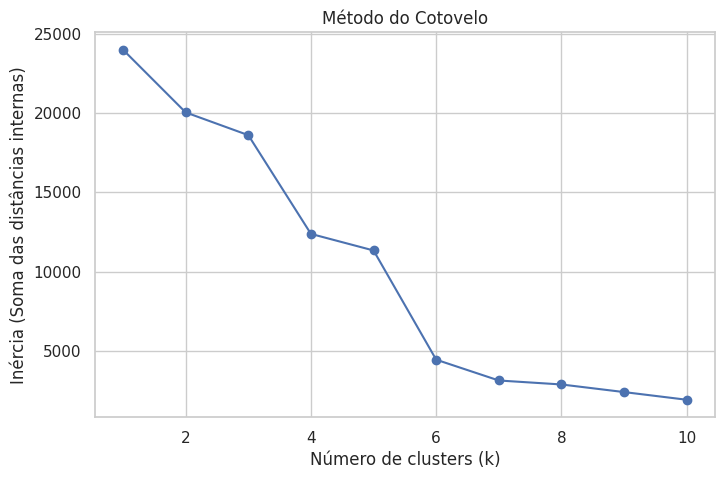

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Testando de 1 a 10 clusters
inercia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_padronizados)
    inercia.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inercia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia (Soma das distâncias internas)')
plt.title('Método do Cotovelo')
plt.grid(True)
plt.show()


In [ ]:
kmeans_final = KMeans(n_clusters=6, random_state=42)
clusters = kmeans_final.fit_predict(dados_padronizados)

df_padronizado['cluster'] = clusters

df_padronizado.head()

,koi_prad,koi_insol,koi_steff,cluster
0,-0.082232,-0.047531,-0.299952,1
1,-0.080406,-0.048031,-0.299952,1
2,-0.042688,-0.047852,0.204981,2
3,0.017751,-0.042805,0.144084,2
4,-0.080662,-0.042602,0.430805,2


## 🔍 Análise Final da Clusterização

A clusterização realizada foi capaz de identificar padrões entre os exoplanetas observados, agrupando-os com base nas variáveis selecionadas:

- `koi_prad`: raio estimado do planeta  
- `koi_insol`: quantidade de radiação recebida da estrela  
- `koi_steff`: temperatura efetiva da estrela hospedeira  

Com o número de clusters definido como **k = 6** (utilizando o Método do Cotovelo), o algoritmo KMeans formou grupos de exoplanetas com características semelhantes. Por exemplo:

- Clusters que agrupam planetas pequenos, com pouca radiação e orbitando estrelas frias.
- Clusters com planetas maiores, muito irradiados e orbitando estrelas mais quentes.

Cada **cluster** pode representar uma **categoria de planeta**, como:

- Planetas com potencial de habitabilidade (baixa radiação e temperatura moderada)
- Planetas muito próximos de suas estrelas (alta radiação e temperatura)
- Planetas frios e possivelmente gasosos (baixa temperatura e grande raio)

Essa segmentação é útil para **guiar pesquisas astronômicas futuras**, facilitando a priorização de estudos com base nas características dos grupos formados.


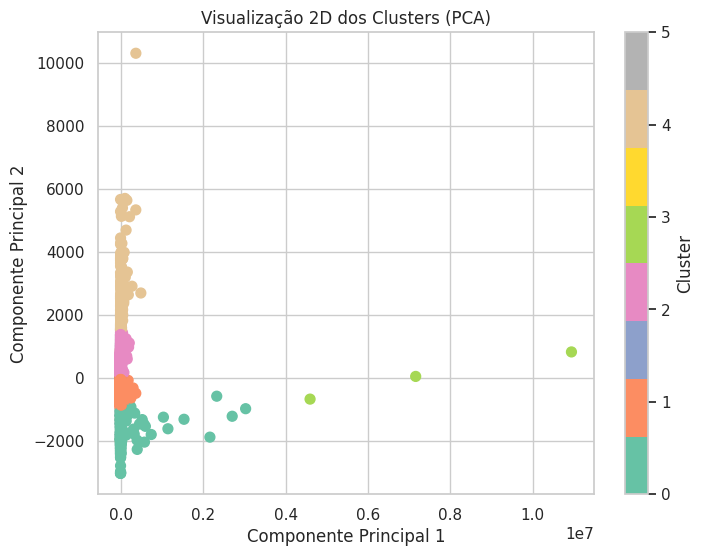

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Redução para 2 dimensões
pca_2d = PCA(n_components=2)
componentes_2d = pca_2d.fit_transform(df_cluster)

# Gráfico
plt.figure(figsize=(8, 6))
plt.scatter(componentes_2d[:, 0], componentes_2d[:, 1], c=df_padronizado['cluster'], cmap='Set2', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização 2D dos Clusters (PCA)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


### 📊 Interpretação do Gráfico 2D de Clusters (PCA)

O gráfico acima representa a projeção bidimensional dos dados após a aplicação da técnica de redução de dimensionalidade PCA (Análise de Componentes Principais). Ele permite visualizar de forma simplificada como os dados se distribuem em relação aos clusters encontrados.

Cada ponto representa um planeta e as cores representam os diferentes clusters atribuídos pelo algoritmo KMeans.

#### 🔍 Observações:

- É possível notar **agrupamentos visualmente distintos**, o que sugere que o algoritmo conseguiu encontrar padrões interessantes nos dados.
- Alguns clusters estão **mais compactos**, indicando que os planetas dentro daquele grupo possuem características semelhantes nas variáveis analisadas (`koi_prad`, `koi_insol`, `koi_steff`).
- Há também **clusters com maior dispersão**, o que pode indicar variabilidade interna maior ou até necessidade de ajuste de parâmetros no algoritmo.
- A distribuição ao longo do eixo da **Componente Principal 1** mostra que alguns planetas têm valores extremos que afetam bastante a variância dos dados (outliers).

#### ✅ Conclusão:

A visualização por PCA reforça que a segmentação dos exoplanetas em clusters é válida, sendo uma ferramenta útil para destacar diferentes perfis planetários. Essa informação pode orientar estudos mais profundos sobre grupos específicos, como candidatos a planetas habitáveis ou com características incomuns.


### 📈 Análise de Regressão Linear

Nesta etapa da análise, buscamos compreender a relação entre o raio do planeta candidato (`koi_prad`) e outras variáveis astrofísicas disponíveis no conjunto de dados. Para isso, aplicamos o modelo de regressão linear simples com o objetivo de verificar se há uma relação estatística significativa entre `koi_prad` e as seguintes variáveis:

- `koi_steff`: Temperatura efetiva da estrela hospedeira;
- `koi_insol`: Quantidade de insolação recebida pelo planeta.

A ideia central é avaliar se é possível prever ou explicar o tamanho do planeta com base em informações sobre sua estrela e o fluxo de energia que recebe. Essa análise também pode ajudar a identificar relações lineares que facilitem a classificação ou previsão de características planetárias.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Separar as variáveis independentes (X) e dependente (y)
X = df_cluster[['koi_steff', 'koi_insol']]
y = df_cluster['koi_prad']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro quadrático médio (MSE): {mse:.4f}")
print(f"Coeficiente de determinação (R²): {r2:.4f}")


Erro quadrático médio (MSE): 9959.2197
Coeficiente de determinação (R²): 0.0040


### 📌 Conclusão da Regressão Linear

O modelo de regressão linear simples foi construído para prever a variável `koi_prad` (raio do planeta candidato) com base nas variáveis `koi_steff` (temperatura efetiva da estrela) e `koi_insol` (fluxo de insolação recebido).

Os resultados foram:

- **Erro quadrático médio (MSE):** 9959.22
- **Coeficiente de determinação (R²):** 0.0040

Esses valores indicam que o modelo possui **baixa capacidade preditiva**. O valor de R² próximo de 0 mostra que a regressão linear **não é adequada** para explicar a variabilidade de `koi_prad` a partir das variáveis escolhidas.

É possível que a relação entre essas variáveis **não seja linear** ou que outros atributos sejam mais relevantes para prever `koi_prad`.


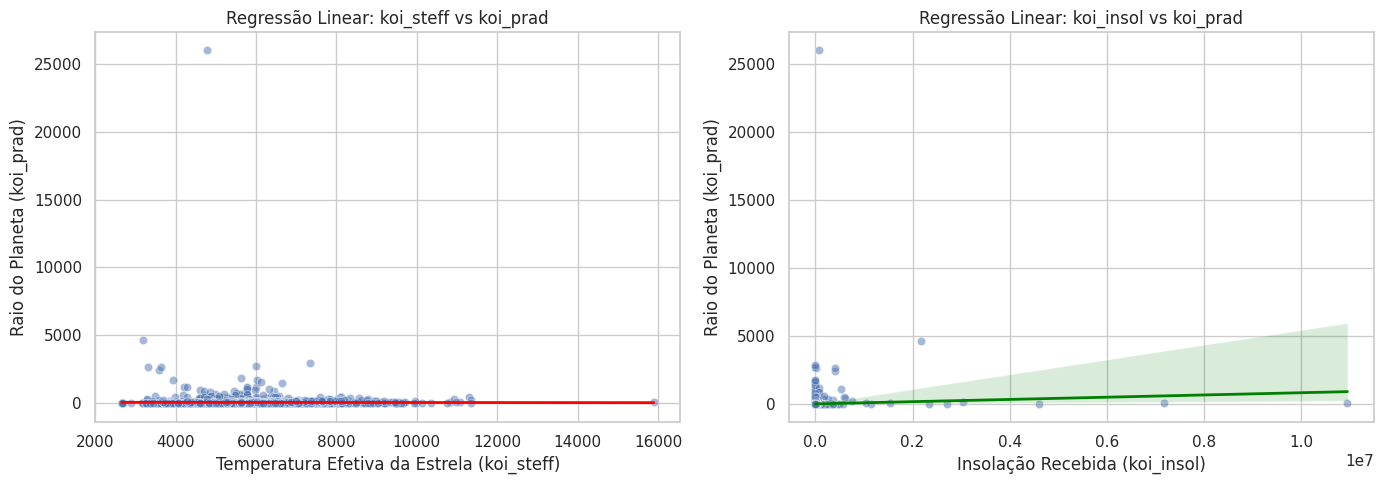

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Gráfico 1: koi_steff vs koi_prad
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df_clean['koi_steff'], y=df_clean['koi_prad'], alpha=0.5)
sns.regplot(x=df_clean['koi_steff'], y=df_clean['koi_prad'], scatter=False, color='red', line_kws={'linewidth':2})
plt.xlabel('Temperatura Efetiva da Estrela (koi_steff)')
plt.ylabel('Raio do Planeta (koi_prad)')
plt.title('Regressão Linear: koi_steff vs koi_prad')

# Gráfico 2: koi_insol vs koi_prad
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_clean['koi_insol'], y=df_clean['koi_prad'], alpha=0.5)
sns.regplot(x=df_clean['koi_insol'], y=df_clean['koi_prad'], scatter=False, color='green', line_kws={'linewidth':2})
plt.xlabel('Insolação Recebida (koi_insol)')
plt.ylabel('Raio do Planeta (koi_prad)')
plt.title('Regressão Linear: koi_insol vs koi_prad')

plt.tight_layout()
plt.show()


### 🔍 Análise Visual da Regressão Linear

A seguir, são apresentados dois gráficos de dispersão com linhas de regressão linear ajustadas, buscando compreender visualmente a relação entre o raio do planeta (`koi_prad`) e duas variáveis explicativas: a temperatura da estrela (`koi_steff`) e a insolação recebida pelo planeta (`koi_insol`).

- **Gráfico 1: koi_steff vs koi_prad**

  No primeiro gráfico, observamos que a linha de regressão é praticamente constante, indicando uma ausência de correlação linear entre a temperatura da estrela e o raio do planeta. A grande dispersão dos pontos ao redor da linha reforça a ideia de que `koi_steff` não é um bom preditor linear para o tamanho do planeta neste conjunto de dados.

- **Gráfico 2: koi_insol vs koi_prad**

  Já o segundo gráfico mostra uma linha de regressão com uma leve inclinação positiva, sugerindo uma possível correlação fraca entre a insolação recebida (`koi_insol`) e o raio do planeta. Contudo, a dispersão dos pontos ainda é elevada e a faixa de confiança (sombreado verde) é larga, o que sinaliza que a relação ainda é muito fraca ou não linear.

Esses resultados são coerentes com os indicadores estatísticos obtidos anteriormente (MSE alto e R² ≈ 0), confirmando que **nenhuma das variáveis demonstra uma relação linear forte com o raio do planeta**. É possível que relações mais complexas (não lineares ou multivariadas) estejam presentes e possam ser investigadas com abordagens diferentes, como modelos polinomiais, árvores de decisão ou redes neurais.


## 🧠 Análise de Classificação

Nesta etapa da análise exploratória, aplicaremos técnicas de **classificação supervisionada** com o objetivo de prever categorias com base nas características dos exoplanetas observados.

Diferente da regressão, que busca prever valores numéricos contínuos, a **classificação** procura atribuir uma instância a uma **categoria específica**. Neste caso, vamos trabalhar com uma variável categórica como **target**, e usar outras variáveis numéricas e/ou categóricas como **features** para treinar modelos classificadores.

### 🔍 Objetivo

Utilizaremos algoritmos de classificação para tentar **prever se um planeta é potencialmente habitável ou não**, ou **identificar a categoria de um planeta com base em características físicas e orbitais** (a depender da disponibilidade e estrutura dos dados).

### ⚙️ Etapas da análise:

1. **Seleção e tratamento dos dados**: Escolheremos a variável-alvo (`target`) e as variáveis explicativas (`features`), tratando valores ausentes e padronizando os dados quando necessário.
2. **Divisão dos dados**: Separaremos o conjunto de dados em treino e teste.
3. **Treinamento dos modelos**: Aplicaremos o algoritmo **Árvore de Decisão**
4. **Avaliação de desempenho**: Utilizaremos métricas como **acurácia**, **matriz de confusão** e **relatório de classificação** para avaliar a performance dos modelos.
5. **Interpretação dos resultados**: Analisaremos se os modelos foram eficazes na tarefa de classificação e que insights podem ser extraídos a partir disso.

---

🔽 Vamos iniciar agora o processo de classificação, começando pela seleção da variável-alvo e das variáveis preditoras.


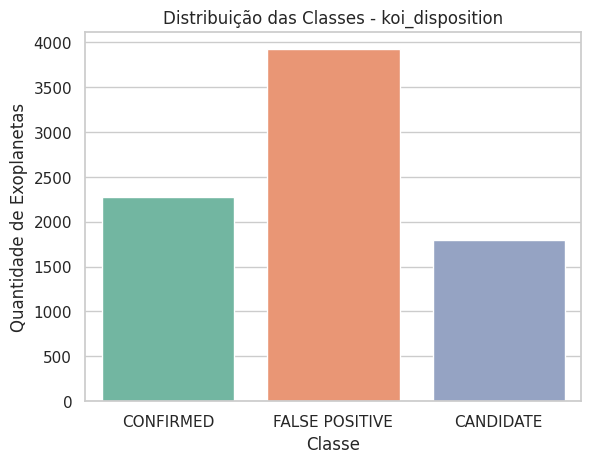

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar distribuição das classes da variável alvo
sns.countplot(data=df_clean, x='koi_disposition', hue='koi_disposition', palette='Set2', legend=False)
plt.title('Distribuição das Classes - koi_disposition')
plt.xlabel('Classe')
plt.ylabel('Quantidade de Exoplanetas')
plt.show()

# Seleção de features
variaveis_classificacao = ['koi_prad', 'koi_insol', 'koi_steff']
df_classificacao = df_clean[['koi_disposition'] + variaveis_classificacao].dropna()

# Separando os dados
X = df_classificacao[variaveis_classificacao]
y = df_classificacao['koi_disposition']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Acurácia: 0.6452688620258441

Relatório de Classificação:
                 precision    recall  f1-score   support

     CANDIDATE       0.43      0.24      0.31       538
     CONFIRMED       0.52      0.81      0.63       684
FALSE POSITIVE       0.84      0.74      0.79      1177

      accuracy                           0.65      2399
     macro avg       0.60      0.59      0.57      2399
  weighted avg       0.66      0.65      0.63      2399



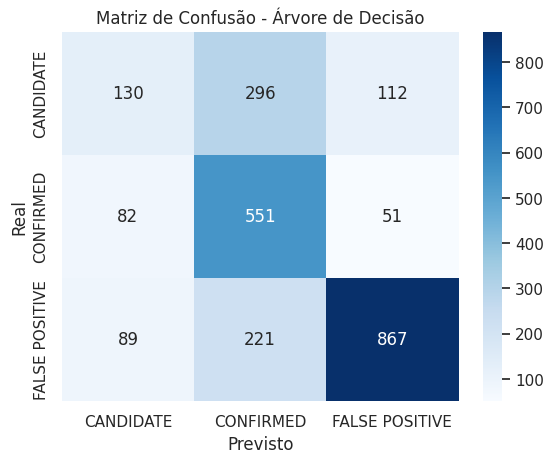

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Features (X) e target (y)
X = df_classificacao[variaveis_classificacao]   # só numéricas
y = df_classificacao['koi_disposition']         # rótulos (strings aceitos)

# 2. Treino / teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Modelo
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# 4. Previsões
y_pred = clf.predict(X_test)

# 5. Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# 6. Matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()


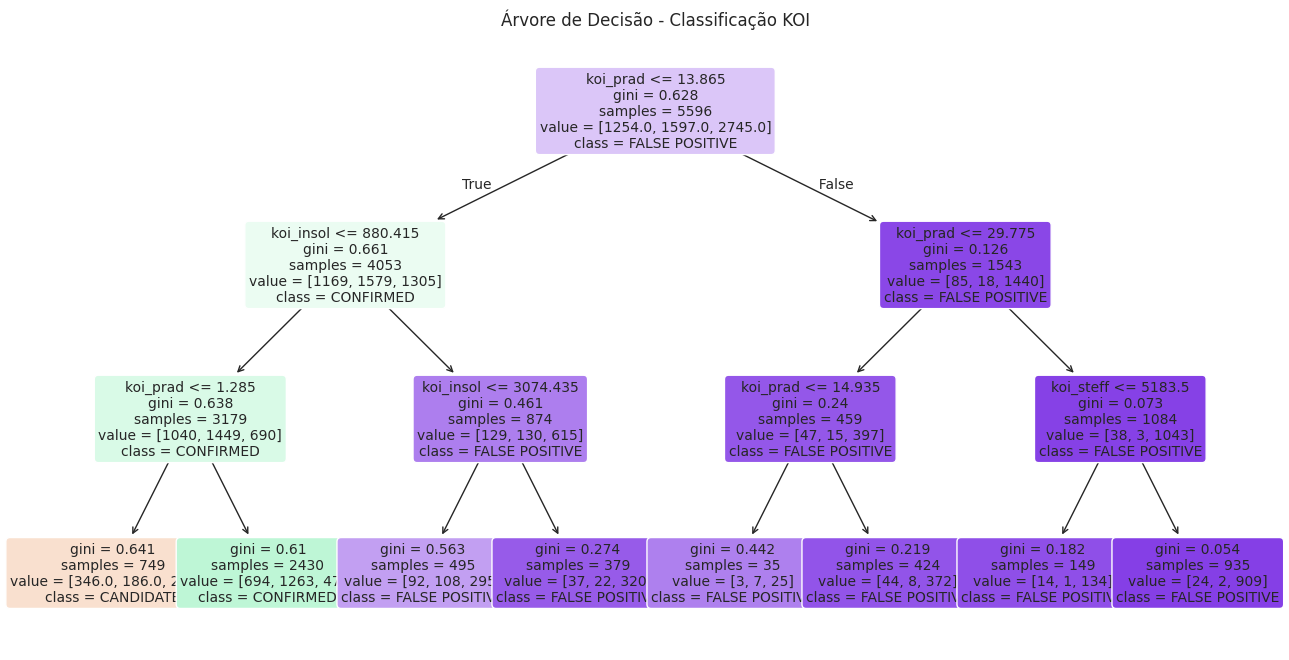

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plot_tree(clf,
          filled=True,
          feature_names=variaveis_classificacao,
          class_names=clf.classes_,
          rounded=True,
          fontsize=10)
plt.title("Árvore de Decisão - Classificação KOI")
plt.show()


# 🌳 Análise da Árvore de Decisão (`max_depth=3`)

Nesta análise, utilizamos uma árvore de decisão com profundidade máxima igual a 3 para classificar exoplanetas com base em características como **raio do planeta (koi_prad)** e **insolação recebida (koi_insol)**. O objetivo é prever se um objeto é um planeta confirmado (`CONFIRMED`), um candidato (`CANDIDATE`) ou um falso positivo (`FALSE POSITIVE`).

## 📌 Por que usar `max_depth=3`?

A profundidade 3 foi escolhida para manter a árvore simples, **interpretável** e ainda assim captar os principais padrões dos dados. Árvores mais profundas podem gerar melhores resultados, mas sacrificam a legibilidade e aumentam o risco de overfitting.

---

## 🌱 Estrutura da Árvore

A árvore inicia a classificação com base na variável `koi_prad` (raio do planeta). A seguir, são usados `koi_insol` (insolação recebida) e novamente `koi_prad` para refinar a decisão.

### Exemplo de caminho de decisão:

```plaintext
Se koi_prad <= 13.865
  E koi_insol <= 880.415
    E koi_prad <= 1.285
      → Classificação: CANDIDATE


# ✅ Conclusão do Projeto

Ao longo deste projeto, realizamos uma análise completa dos dados da Missão Kepler utilizando diferentes abordagens estatísticas e de aprendizado de máquina. As principais etapas e descobertas foram:

---

## 🔍 **1. Inferência Estatística**
Identificamos padrões nas variáveis contínuas, analisamos a distribuição dos dados e exploramos correlações entre variáveis relevantes como **raio do planeta**, **insolação recebida**, **período orbital** e **temperatura estelar**.

---

## 🔎 **2. Clusterização**
Aplicando o algoritmo **K-Means**, encontramos **agrupamentos naturais** entre os exoplanetas, revelando possíveis categorias baseadas em suas características físicas, como tamanho e exposição à radiação estelar.

---

## 📈 **3. Regressão**
Utilizamos regressão linear para entender quais variáveis mais influenciam o **raio dos planetas**. Observamos, por exemplo, que a **insolação recebida** e o **período orbital** têm relação com o tamanho planetário, embora com limitações preditivas.

---

## 🤖 **4. Classificação com Árvore de Decisão**
Treinamos uma árvore de decisão para classificar planetas como **Confirmado**, **Candidato** ou **Falso Positivo** com base em suas propriedades. A árvore com profundidade 3 demonstrou resultados interpretáveis e razoavelmente eficazes, destacando o **raio** e a **insolação** como critérios relevantes.

---

## 🧠 Considerações Finais

O projeto demonstra como técnicas de **Ciência de Dados** podem ser aplicadas na exploração de dados astronômicos para:

- Identificar padrões e agrupamentos;
- Construir modelos preditivos;
- Ajudar cientistas e pesquisadores a entenderem melhor as características dos exoplanetas.

Essa abordagem pode ser expandida com modelos mais complexos, tuning de hiperparâmetros e outras técnicas de classificação como **Random Forests**, **SVM** ou **Redes Neurais** para melhorar a performance preditiva.

---

✨ **Obrigado por acompanhar este projeto!**

